In [1]:
import pandas as pd
import string
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amirh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
games = pd.read_json('https://raw.githubusercontent.com/sshmo/crawler/master/games.jl', lines=True)
games.set_index('name')

,genre,score,score_num,downloads,description
name,,,,,
Lords Mobile: Kingdom Wars,Strategy,4.3,"5,946,326","100,000,000+",Are you ready for a REAL fight?\n\nThe true Em...
Fishdom,Puzzle,4.4,"4,565,785","100,000,000+",Never Fishdomed before? Take a deep breath and...
State of Survival: Survive the Zombie Apocalypse,Strategy,4.4,"1,522,191","10,000,000+","""It's been six months since the zombie apocaly..."
Genshin Impact,Adventure,4.5,"1,060,121","10,000,000+","Step into Teyvat, a vast world teeming with li..."
Gardenscapes,Casual,4.4,"10,246,959","100,000,000+",Welcome to Gardenscapes—the first hit from Pla...
...,...,...,...,...,...
Slotpark - Online Casino Games & Free Slot Machine,Casino,4.3,"160,706","5,000,000+",Slotpark Online Casino\n\nCome on in! Enjoy th...
新三國志手機版-光榮特庫摩授權,Strategy,3.6,"20,202","500,000+",《新三國志手機版》是港澳台新馬地區唯一由光榮特庫摩正版授權，基於《三國志11》研發的手遊，是...
Brawl Stars,Action,4.2,"15,695,753","100,000,000+",Fast-paced 3v3 multiplayer and battle royale m...


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         199 non-null    object 
 1   genre        199 non-null    object 
 2   score        199 non-null    float64
 3   score_num    199 non-null    object 
 4   downloads    199 non-null    object 
 5   description  199 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


In [4]:
games.loc[0,'description']

'Are you ready for a REAL fight?\n\nThe true Emperor has fallen. We need a real hero, a true Lord who can unite the Kingdoms. Recruit heroes from various backgrounds, from dwarves and mermaids to dark elves and steampunk robots, and assemble your army in this magical world! Fight and conquer to establish your empire!\n\n[Game Features]:\n\n▶ ▶ Build Your Own Kingdom ◀◀\nUpgrade buildings, conduct research, train your troops, level your Heroes and lead your Kingdom well to prosper!\n\n▶ ▶ Utilize Troop Formations ◀◀\n4 different troop types, and 6 different troop formations for you to choose from! Plan your lineups, take advantage of the counter system, and pair your troops with the right Heroes! Perfect your strategy to defeat your enemies!\n\n▶ ▶ Powerful Heroes Await ◀◀\nCreate a strong team of 5 Heroes to fight through an RPG-style campaign! Let them lead your kingdom to glory as war generals!\n\n▶ ▶ Forge Alliances ◀◀\nJoin a guild to fight alongside your allies! Ride into war toge

In [5]:
# 1.lowercase

for i in range(199):
    games.loc[i,'description'] = games.loc[i,'description'].lower()
    
games.loc[0,'description']

'are you ready for a real fight?\n\nthe true emperor has fallen. we need a real hero, a true lord who can unite the kingdoms. recruit heroes from various backgrounds, from dwarves and mermaids to dark elves and steampunk robots, and assemble your army in this magical world! fight and conquer to establish your empire!\n\n[game features]:\n\n▶ ▶ build your own kingdom ◀◀\nupgrade buildings, conduct research, train your troops, level your heroes and lead your kingdom well to prosper!\n\n▶ ▶ utilize troop formations ◀◀\n4 different troop types, and 6 different troop formations for you to choose from! plan your lineups, take advantage of the counter system, and pair your troops with the right heroes! perfect your strategy to defeat your enemies!\n\n▶ ▶ powerful heroes await ◀◀\ncreate a strong team of 5 heroes to fight through an rpg-style campaign! let them lead your kingdom to glory as war generals!\n\n▶ ▶ forge alliances ◀◀\njoin a guild to fight alongside your allies! ride into war toge

In [6]:
# 2.Removing Punctuation and unicode chars

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
for i in range(199):
    games.loc[i,'description'] = "".join([char for char in games.loc[i,'description'] if char not in string.punctuation])
    # Remove unicode characters
    games.loc[i,'description'] = games.loc[i,'description'].encode('ascii', 'ignore').decode()
    
games.loc[0,'description']

'are you ready for a real fight\n\nthe true emperor has fallen we need a real hero a true lord who can unite the kingdoms recruit heroes from various backgrounds from dwarves and mermaids to dark elves and steampunk robots and assemble your army in this magical world fight and conquer to establish your empire\n\ngame features\n\n  build your own kingdom \nupgrade buildings conduct research train your troops level your heroes and lead your kingdom well to prosper\n\n  utilize troop formations \n4 different troop types and 6 different troop formations for you to choose from plan your lineups take advantage of the counter system and pair your troops with the right heroes perfect your strategy to defeat your enemies\n\n  powerful heroes await \ncreate a strong team of 5 heroes to fight through an rpgstyle campaign let them lead your kingdom to glory as war generals\n\n  forge alliances \njoin a guild to fight alongside your allies ride into war together to conquer various exhilarating even

In [8]:
# 3.Tokenization

words = list()

for i in range(199):
    words.append(word_tokenize(games.loc[i,'description']))
    
words = np.array(words)

<ipython-input-8-e0a901a86932>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  words = np.array(words)


In [9]:
games.description[0]

'are you ready for a real fight\n\nthe true emperor has fallen we need a real hero a true lord who can unite the kingdoms recruit heroes from various backgrounds from dwarves and mermaids to dark elves and steampunk robots and assemble your army in this magical world fight and conquer to establish your empire\n\ngame features\n\n  build your own kingdom \nupgrade buildings conduct research train your troops level your heroes and lead your kingdom well to prosper\n\n  utilize troop formations \n4 different troop types and 6 different troop formations for you to choose from plan your lineups take advantage of the counter system and pair your troops with the right heroes perfect your strategy to defeat your enemies\n\n  powerful heroes await \ncreate a strong team of 5 heroes to fight through an rpgstyle campaign let them lead your kingdom to glory as war generals\n\n  forge alliances \njoin a guild to fight alongside your allies ride into war together to conquer various exhilarating even

In [10]:
print(words[0])

['are', 'you', 'ready', 'for', 'a', 'real', 'fight', 'the', 'true', 'emperor', 'has', 'fallen', 'we', 'need', 'a', 'real', 'hero', 'a', 'true', 'lord', 'who', 'can', 'unite', 'the', 'kingdoms', 'recruit', 'heroes', 'from', 'various', 'backgrounds', 'from', 'dwarves', 'and', 'mermaids', 'to', 'dark', 'elves', 'and', 'steampunk', 'robots', 'and', 'assemble', 'your', 'army', 'in', 'this', 'magical', 'world', 'fight', 'and', 'conquer', 'to', 'establish', 'your', 'empire', 'game', 'features', 'build', 'your', 'own', 'kingdom', 'upgrade', 'buildings', 'conduct', 'research', 'train', 'your', 'troops', 'level', 'your', 'heroes', 'and', 'lead', 'your', 'kingdom', 'well', 'to', 'prosper', 'utilize', 'troop', 'formations', '4', 'different', 'troop', 'types', 'and', '6', 'different', 'troop', 'formations', 'for', 'you', 'to', 'choose', 'from', 'plan', 'your', 'lineups', 'take', 'advantage', 'of', 'the', 'counter', 'system', 'and', 'pair', 'your', 'troops', 'with', 'the', 'right', 'heroes', 'perfec

In [11]:
# 4.Stopword Filtering

stop_words = stopwords.words('english')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
filtered_words = list()

for row in words:
    for word in row:
        if word not in stop_words:
            filtered_words.append(word)

In [13]:
filtered_words

['ready',
 'real',
 'fight',
 'true',
 'emperor',
 'fallen',
 'need',
 'real',
 'hero',
 'true',
 'lord',
 'unite',
 'kingdoms',
 'recruit',
 'heroes',
 'various',
 'backgrounds',
 'dwarves',
 'mermaids',
 'dark',
 'elves',
 'steampunk',
 'robots',
 'assemble',
 'army',
 'magical',
 'world',
 'fight',
 'conquer',
 'establish',
 'empire',
 'game',
 'features',
 'build',
 'kingdom',
 'upgrade',
 'buildings',
 'conduct',
 'research',
 'train',
 'troops',
 'level',
 'heroes',
 'lead',
 'kingdom',
 'well',
 'prosper',
 'utilize',
 'troop',
 'formations',
 '4',
 'different',
 'troop',
 'types',
 '6',
 'different',
 'troop',
 'formations',
 'choose',
 'plan',
 'lineups',
 'take',
 'advantage',
 'counter',
 'system',
 'pair',
 'troops',
 'right',
 'heroes',
 'perfect',
 'strategy',
 'defeat',
 'enemies',
 'powerful',
 'heroes',
 'await',
 'create',
 'strong',
 'team',
 '5',
 'heroes',
 'fight',
 'rpgstyle',
 'campaign',
 'let',
 'lead',
 'kingdom',
 'glory',
 'war',
 'generals',
 'forge',
 'al

In [14]:
# 5.Stemming

porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]
print(stemmed_words)

['readi', 'real', 'fight', 'true', 'emperor', 'fallen', 'need', 'real', 'hero', 'true', 'lord', 'unit', 'kingdom', 'recruit', 'hero', 'variou', 'background', 'dwarv', 'mermaid', 'dark', 'elv', 'steampunk', 'robot', 'assembl', 'armi', 'magic', 'world', 'fight', 'conquer', 'establish', 'empir', 'game', 'featur', 'build', 'kingdom', 'upgrad', 'build', 'conduct', 'research', 'train', 'troop', 'level', 'hero', 'lead', 'kingdom', 'well', 'prosper', 'util', 'troop', 'format', '4', 'differ', 'troop', 'type', '6', 'differ', 'troop', 'format', 'choos', 'plan', 'lineup', 'take', 'advantag', 'counter', 'system', 'pair', 'troop', 'right', 'hero', 'perfect', 'strategi', 'defeat', 'enemi', 'power', 'hero', 'await', 'creat', 'strong', 'team', '5', 'hero', 'fight', 'rpgstyle', 'campaign', 'let', 'lead', 'kingdom', 'glori', 'war', 'gener', 'forg', 'allianc', 'join', 'guild', 'fight', 'alongsid', 'alli', 'ride', 'war', 'togeth', 'conquer', 'variou', 'exhilar', 'event', 'guild', 'war', 'kingdom', 'versu',

In [15]:
print('stemmed words type : {} \nstemmed words count: {} '.format(type(stemmed_words), len(stemmed_words)))
print('filtered words type : {} \nfiltered words count: {} '.format(type(filtered_words), len(filtered_words)))

stemmed words type : <class 'list'> 
stemmed words count: 47550 
filtered words type : <class 'list'> 
filtered words count: 47550 


In [16]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [17]:
stemmed_freq = wordListToFreqDict(stemmed_words)

In [18]:
filtered_freq = wordListToFreqDict(filtered_words)

In [19]:
stemmed_freq_sort = dict(sorted(stemmed_freq.items(), key=lambda item: item[1], reverse=True))

In [20]:
filtered_freq_sort = dict(sorted(filtered_freq.items(), key=lambda item: item[1], reverse=True))

In [21]:
stemmed_freq_sort

['game',
 'play',
 'free',
 'world',
 'new',
 'battl',
 'slot',
 'build',
 'friend',
 'player',
 'featur',
 'casino',
 'war',
 'collect',
 'win',
 'real',
 'hero',
 'get',
 'power',
 'strategi',
 'take',
 'onlin',
 'use',
 'puzzl',
 'fun',
 'charact',
 'join',
 'challeng',
 'best',
 'level',
 'experi',
 'time',
 'like',
 'fight',
 'reward',
 'make',
 'becom',
 'dragon',
 'match',
 'adventur',
 'citi',
 'team',
 'one',
 'stori',
 'set',
 'poker',
 'enemi',
 'enjoy',
 'everi',
 'facebook',
 'help',
 'epic',
 'purchas',
 'us',
 'download',
 'empir',
 'money',
 'upgrad',
 'uniqu',
 'anim',
 'creat',
 'mode',
 'skill',
 'item',
 'farm',
 'armi',
 'way',
 'custom',
 'mobil',
 'event',
 'card',
 'app',
 'top',
 'allianc',
 'want',
 'bingo',
 'machin',
 'around',
 'go',
 'differ',
 'requir',
 'kingdom',
 'privaci',
 'unlock',
 'devic',
 'even',
 'race',
 'magic',
 'servic',
 'excit',
 'start',
 'king',
 'multiplay',
 'polici',
 'complet',
 'find',
 'term',
 'rpg',
 'connect',
 'earn',
 'gamepl

In [22]:
filtered_freq_sort

{'game': 705,
 'play': 445,
 'free': 433,
 'new': 380,
 'world': 370,
 'games': 307,
 'friends': 250,
 'battle': 238,
 'casino': 233,
 'build': 220,
 'players': 219,
 'slots': 216,
 'real': 212,
 'get': 196,
 'war': 187,
 'online': 176,
 'features': 171,
 'strategy': 165,
 'collect': 164,
 'fun': 163,
 'join': 160,
 'best': 159,
 'win': 151,
 'heroes': 150,
 'like': 148,
 'experience': 144,
 'take': 141,
 'become': 137,
 'characters': 137,
 'time': 135,
 'slot': 132,
 'rewards': 130,
 'poker': 129,
 'every': 127,
 'facebook': 126,
 'one': 126,
 'make': 124,
 'epic': 124,
 'us': 122,
 'help': 120,
 'money': 119,
 'enjoy': 118,
 'use': 117,
 'fight': 116,
 'team': 115,
 'unique': 114,
 'adventure': 113,
 'city': 113,
 'battles': 109,
 'mobile': 107,
 'items': 103,
 'events': 101,
 'bingo': 101,
 'around': 99,
 'top': 99,
 'create': 98,
 'powerful': 97,
 'match': 96,
 'download': 95,
 'empire': 94,
 'way': 94,
 'story': 94,
 'army': 93,
 'privacy': 93,
 'even': 92,
 'app': 91,
 'levels': 

In [23]:
st = pd.Series(stemmed_freq_sort)
wst = pd.Series(filtered_freq_sort)

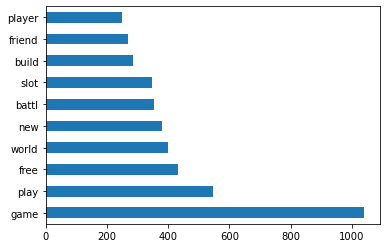

In [24]:
st.iloc[0:10].plot(kind='barh')

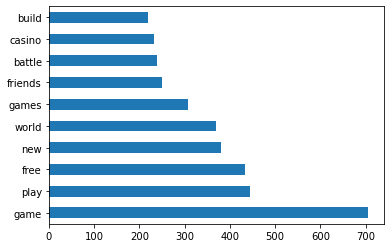

In [25]:
wst.iloc[0:10].plot(kind='barh')

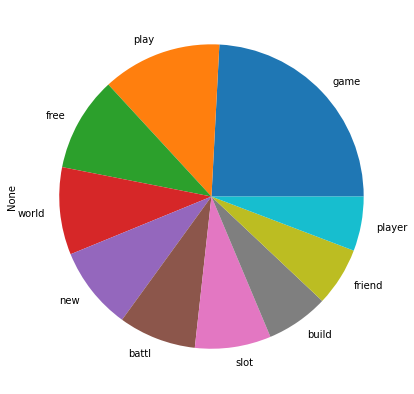

In [26]:
st.iloc[0:10].plot(kind='pie', figsize=(7, 7))